In [2]:
from bs4 import BeautifulSoup
import urllib.request, urllib.error, urllib.parse
# source = urllib.request.urlopen("https://gap.pissedconsumer.com/1/RT-P.html/").read()
import requests
import random
import pandas as pd

headers_list = [
    {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Referer": "https://www.google.com/",
        "DNT": "1",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1"
    },
    {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate, br",
        "Referer": "https://www.google.com/",
        "DNT": "1",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1"
    },
    {
        "Connection": "keep-alive",
        "DNT": "1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Dest": "document",
        "Referer": "https://www.google.com/",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
    }, 
    {
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/114.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Sec-Fetch-Site": "same-origin",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-User": "?1",
        "Sec-Fetch-Dest": "document",
        "Referer": "https://www.google.com/",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9"hollister
    }
]


In [51]:
headers = random.choice(headers_list)
r = requests.Session()
r.headers = headers
html = r.get('https://gap.pissedconsumer.com/1/RT-P.html/').text


In [31]:
comp_list=["gap","banana-republic","old-navy","uniqlo","h-and-m","zara","jcpenney","tj-maxx","macys","ross-dress-for-less","burlington-stores","nordstrom","dillards","loft","the-childrens-place","forever-21","j-crew","urban-outfitters","anthropologie","american-eagle-outfitters","express-clothing","maurices","aeropostale","hollister","abercrombie-and-fitch","lululemon-athletica"]
for companies in comp_list:
    flag=0
    j=1
    author_list=[]
    subject_list=[]
    date_of_review_list=[]
    review_list=[]
    rating_list=[]
    while flag==0:
        headers = random.choice(headers_list)
        r = requests.Session()
        r.headers = headers
        html = r.get('https://'+companies+'.pissedconsumer.com/'+str(j)+'/RT-P.html/').text
        soup = BeautifulSoup(html, "html.parser")
        title = soup.find('h1',class_="title-section-h1")
    #     print(title.string)
        average_rating = soup.find('span', class_="rating-title text large bold-text")
    #     print(average_rating.string)

        reviews=soup.find('div', class_="listing-container review-item-container").find_all('div',class_="f-component-info")
        for rev in reviews:
            author = rev.find('span', class_="grey-text author text-overflow-ellipsis").find('span', itemprop="name")
        #     print(author.string)
            subject = rev.find('div', class_="f-component-info-header").find('h2')
        #     print(subject.string)
            date_of_review = rev.find('time', class_="mr24px-desktop")
        #     print(date_of_review.string)
            rating = rev.find('div', class_="rating-title action-element bold-link-third")
#             print(rating)
#             print(rating.string)
            if rating is not None:
                rating_str=rating.string
            else:
                rating_str=""
            review = rev.find('div', class_="f-component-text review_text_container review-track").find('div')
#             print(len(review))
            if review is not None:
                review_str=review.string
            else:
                review_str=""

        #     print(review.string)
            author_list.append(author.string)
            subject_list.append(subject.string)
            date_of_review_list.append(date_of_review.string)
            rating_list.append(rating_str)
            review_list.append(review_str)
#             author.string=""
#             subject.string=""
#             date_of_review.string=""
#             rating_str=""
#             review_str=""
    #     print(review_list)
        if soup.find('li', class_="next hidden"):
            flag=1
        j+=1
    df = pd.DataFrame({'Author': author_list, 'Subject': subject_list, 'Date': date_of_review_list, 'Rating': rating_list, 'Review': review_list})
    with pd.ExcelWriter('output.xlsx', engine='openpyxl', mode='a') as writer:
# Write each DataFrame to a separate sheet
        df.to_excel(writer, sheet_name=companies, index=False)
#     df.to_csv('pissed_consumer.csv',index=False)




ValueError: Sheet 'lululemon-athletica' already exists and if_sheet_exists is set to 'error'.

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!--[if IE]><meta http-equiv='X-UA-Compatible' content='IE=edge,chrome=1'><![endif]-->
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, viewport-fit=auto" name="viewport"/>
<meta content="Gap has 528 reviews (average rating 2.4). Consumers say: Damaged Shirt, They are a bunch of dirtbags who can’t even read a simple sentence. I want my return. My reward points returned. They have my items they’re confused and low IQ." name="description"/>
<meta content="#4b64a6" name="theme-color"/>
<link as="font" crossorigin="" href="/themes/pc2/fonts/Linearicons-Custom.woff?2826653528266535" rel="preload" type="font/woff"/>
<link href="https://www.pissedconsumer.com/images/favicons/apple-icons-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="https://www.pissedconsumer.com/images/favicons/apple-icons-152x152.png" rel="apple-touch-icon" sizes="152x152"/
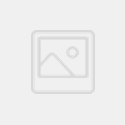

In [26]:
soup

In [ ]:
<div id="js-company-overview-outer" class="widget auto-hide small short-block">
    <h3>Zara Overview</h3>
            <ul class="overview-list">
                            <li><p><em class="lnr-chart-bars"></em>Zara has <strong>1.8 star rating</strong> based on 592 customer reviews and ranks 975 of 4231 among companies in Footwear and Clothing category. Consumers are mostly dissatisfied.</p><p></p><div class="bold-text mb12px-desktop">Rating Distribution</div><p></p><div class="progress-stacked-bar-container mb8px-desktop"><div class="progress-stacked-bar progress-bar-unfavorable" data-unfavorable="79" style="width: 79%;"></div><div class="progress-stacked-bar progress-bar-positive" data-positive="4" style="width: 4%;"></div></div><div class="row-inline space-between js-overview-text" style="height:17px;">
                <strong class="progress-bar-unfavorable_text text small">79% unfavorable</strong>
                <strong class="progress-bar-positive_text text small">4% positive</strong>
            </div></li>                            <li><p><em class="lnr-balance"></em><strong>Pros:</strong> Nice clothing, Affordable styles and designs, Good range of attractive clothes and prices.</p><p><strong>Cons:</strong> Customer service, Not caring about customer satisfaction, Serious lack of respect for us customers.</p></li>                            <li><p><em class="lnr-users"></em> <strong>Recent recommendations</strong> regarding this business are as follows: "Target honors price in store and online - Zara does not-Yet sends sales tags on merch", "Zara customer service is very bad", "Feel that this entity has the good sense to stand behind its products", "Do not buy Zara online. They refuse to return calls and my money.", "Keep your recipes".</p></li>                    </ul>
        <div class="show-more-outer">
            <span class="more-normal action-element" rel-lightbox="full-company-overview-lbx" data-tm-event="Review Listing" data-tm-category="by page" data-tm-action="Widgets: Company overview" data-tm-label="Click on View full overview">
                View full overview            </span>
        </div>
        
    </div>